# Rectangular Beam check EN 1992-1-1

**Define concrete and steel materials, and then assign the beam**

In [ ]:
from mento import Concrete_EN_1992_2004, SteelBar, RectangularBeam, mm, cm, kN, MPa, kNm
from mento import Forces, Node

# Define materials
concrete = Concrete_EN_1992_2004(name="H-25", f_ck=25*MPa)
steel = SteelBar(name="ADN 500", f_y=500*MPa)

# Define beam geometry
beam = RectangularBeam(label="101", concrete=concrete, steel_bar=steel, width=20*cm, height=50*cm)
beam.data

Beam 101, $b$=20.00 cm, $h$=50.00 cm, $c_{c}$=2.50 cm,                             Concrete H25, Rebar ADN 500.

**Set longitudinal and transverse reinforcement**

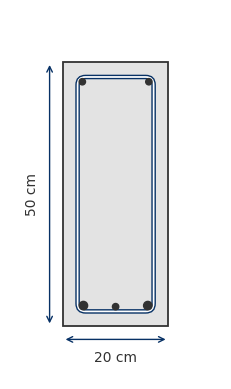

In [2]:
# Set bottom longitudinal reinforcement
beam.set_longitudinal_rebar_bot(n1=2, d_b1=16*mm, n2=1, d_b2=12*mm)

# Set top longitudinal reinforcement
beam.set_longitudinal_rebar_top(n1=2, d_b1=12*mm)

# Set transverse reinforcement (stirrups)
beam.set_transverse_rebar(n_stirrups=1, d_b=6*mm, s_l=20*cm)

# Plot the beam geometry and reinforcement
beam.plot()

**Define list of forces applied to the beam**

In [3]:
# Define forces
f1 = Forces(label='1.4D', V_z=50*kN, M_y=80*kNm)
f2 = Forces(label='1.2D+1.6L', V_z=55*kN, M_y=-30*kNm)
print(f1)
print(f2)

Force ID: 1, Label: 1.4D, N_x: 0.00 kN, V_z: 50.00 kN, M_y: 80.00 kN·m
Force ID: 2, Label: 1.2D+1.6L, N_x: 0.00 kN, V_z: 55.00 kN, M_y: -30.00 kN·m


**Create node and assign beam section and list of forces**

In [4]:
node_1 = Node(section=beam, forces=[f1, f2])
node_1

Node ID: 1 - Section label: 101
Forces Applied:
  - Force ID: 1, Label: 1.4D, N_x: 0.00 kN, V_z: 50.00 kN, M_y: 80.00 kN·m
  - Force ID: 2, Label: 1.2D+1.6L, N_x: 0.00 kN, V_z: 55.00 kN, M_y: -30.00 kN·m

**Perform shear and bending checks**

In [5]:
# Perform all checks
node_1.check_shear()
# node_1.check_flexure()
# Print results in Markdown format
node_1.results

Beam 101, $b$=20.00 cm, $h$=50.00 cm, $c_{c}$=2.50 cm,                             Concrete H25, Rebar ADN 500.

Shear reinforcing 1eØ6/20 cm, $A_{sw}$=2.83 cm²/m, $V_{Ed,2}$=55 kN, $V_{Rd,s}$=127.64 kN → $\color{#439b00}{\text{DCR}=0.43}$ 

In [6]:
# Print shear results in more detailed format in a DataFrame
node_1.check_shear()

,Label,"Av,min","Av,req",Av,"VEd,1","VEd,2","VRd,c","VRd,s",VRd,"VRd,max","VEd,1<VRd,max","VEd,2<VRd",DCR
0,101,1.60 cm²/m,1.60 cm²/m,2.83 cm²/m,50.00 kN,50.00 kN,0.00 kN,127.64 kN,127.64 kN,257.76 kN,True,True,0.392
1,101,1.60 cm²/m,1.60 cm²/m,2.83 cm²/m,55.00 kN,55.00 kN,0.00 kN,127.64 kN,127.64 kN,257.76 kN,True,True,0.431


In [7]:
# Print flexure results in more detailed format in a DataFrame
node_1.check_flexure()

ValueError: Flexure design method not implemented for concrete type: Concrete_EN_1992_2004

**Export table results to Excel**

In [8]:
node_1.check_shear().to_excel('EN 1992-1-1 shear_results.xlsx')
# node_1.check_flexure().to_excel('EN 1992-1-1 flexure_results.xlsx')

**View complete and detailed results for the limiting case of the list of forces**

In [9]:
# View detailed shear results
node_1.shear_results_detailed()

===== BEAM SHEAR DETAILED RESULTS =====
Materials                                               Variable     Value  Unit
-----------------------------------------------------  ----------  -------  ------
Section Label                                                          101
Concrete strength                                         fck           25  MPa
Steel reinforcement yield strength                        fywk         500  MPa
Safety factor for concrete                                 γc          1.5
Safety factor for steel                                    γs         1.15
Coefficient for long term effects and loading effects     αcc            1 

Geometry                     Variable     Value  Unit
--------------------------  ----------  -------  ------
Section height                  h            50  cm
Section width                   b            20  cm
Clear cover                   rgeom         2.5  cm
Longitudinal tension rebar      As         2.26  cm² 

Design forces

In [ ]:
# View detailed flexure results
node_1.flexure_results_detailed()

===== BEAM FLEXURE DETAILED RESULTS =====
Materials                            Variable     Value  Unit
----------------------------------  ----------  -------  ------
Section Label                                       101
Concrete strength                       fc           25  MPa
Steel reinforcement yield strength      fy          420  MPa 

Geometry                  Variable     Value  Unit
-----------------------  ----------  -------  ------
Section height               h            50  cm
Section width                b            20  cm
Clear cover                  cc          2.5  cm
Mechanical top cover       cm,top        4.1  cm
Mechanical bottom cover    cm,bot       4.26  cm 

Design forces       Variable     Value  Unit
-----------------  ----------  -------  ------
Top max moment       Mu,top        -30  kNm
Bottom max moment    Mu,bot         80  kNm 

Check                     Unit     Value  Min.    Max.    Ok?
-----------------------  ------  -------  ------  ------ 

**Export detailed results to a Word document**

In [10]:
node_1.shear_results_detailed_doc()
# node_1.flexure_results_detailed_doc()